In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv('train_petrol.csv')

In [61]:
df.head()

,MGO LOCAL (GHp/Lt),KEROSENE (GHp/Lt),LPG (GHp/Kg),DIESEL (GHp/Lt),PETROL (GHp/Lt)
0,768.23,639.13,838.98,682.0,780.0
1,888.73,750.00,937.65,796.0,798.0
2,903.04,830.00,972.98,938.0,940.0
3,1063.78,1108.13,1157.98,1255.0,1120.0
4,1037.96,1199.30,1087.96,1236.0,1180.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MGO LOCAL (GHp/Lt)  19 non-null     float64
 1   KEROSENE (GHp/Lt)   19 non-null     float64
 2   LPG (GHp/Kg)        19 non-null     float64
 3   DIESEL (GHp/Lt)     19 non-null     float64
 4   PETROL (GHp/Lt)     19 non-null     float64
dtypes: float64(5)
memory usage: 888.0 bytes


In [63]:
df.columns

Index(['MGO LOCAL (GHp/Lt)', 'KEROSENE (GHp/Lt)', 'LPG (GHp/Kg)',
       'DIESEL (GHp/Lt)', 'PETROL (GHp/Lt)'],
      dtype='object')

In [64]:
df.isnull().sum()

MGO LOCAL (GHp/Lt)    0
KEROSENE (GHp/Lt)     0
LPG (GHp/Kg)          0
DIESEL (GHp/Lt)       0
PETROL (GHp/Lt)       0
dtype: int64

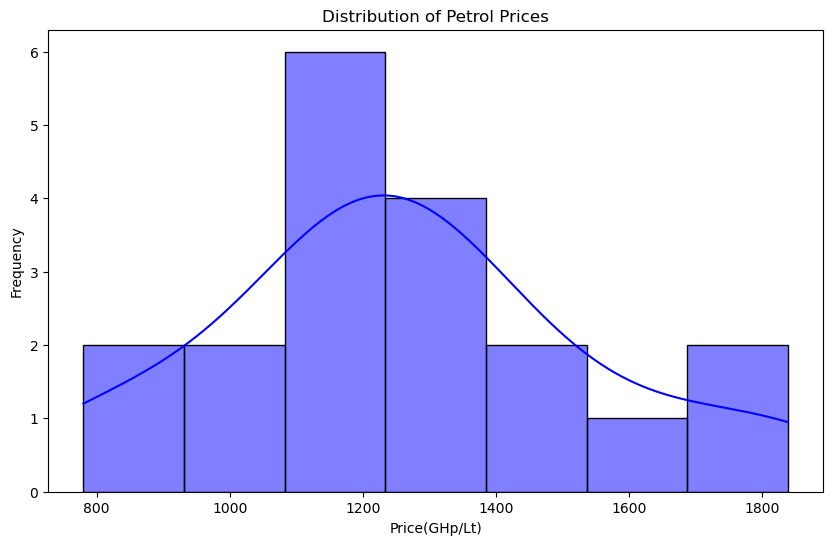

In [65]:
plt.figure(figsize=(10,6))
sns.histplot(df['PETROL (GHp/Lt)'], kde=True, color='blue')
plt.title('Distribution of Petrol Prices')
plt.xlabel('Price(GHp/Lt)')
plt.ylabel('Frequency')
plt.show()

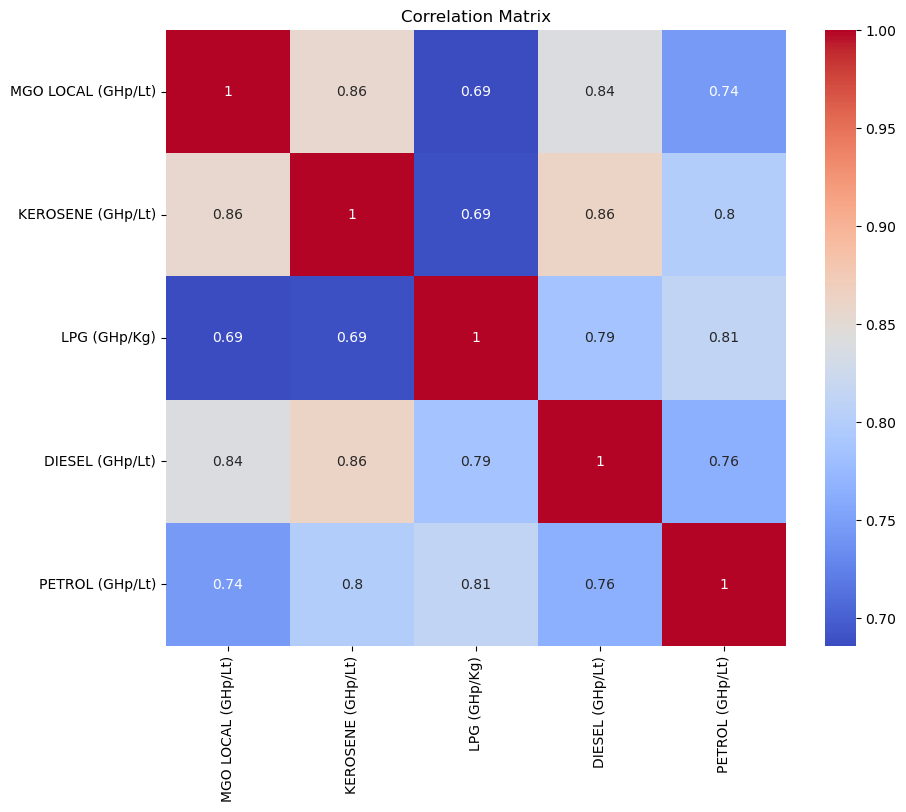

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
corr_matrix = df.corr()

# Identify the most relevant features for predicting 'Petrol Prices'
relevant_features = corr_matrix['PETROL (GHp/Lt)'].sort_values(ascending=False)
print(relevant_features)

PETROL (GHp/Lt)       1.000000
LPG (GHp/Kg)          0.813227
KEROSENE (GHp/Lt)     0.799195
DIESEL (GHp/Lt)       0.764944
MGO LOCAL (GHp/Lt)    0.744731
Name: PETROL (GHp/Lt), dtype: float64


In [68]:
X = df.drop('PETROL (GHp/Lt)', axis=1)
y = df['PETROL (GHp/Lt)']

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the performance of the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 27562.49979919983
R-squared: -0.6397346023981825


In [70]:
rf_model

RandomForestRegressor(random_state=42)

In [71]:
import joblib

In [72]:
joblib.dump(rf_model, 'random_forest_regressor_model_for_petrol.joblib')

['random_forest_regressor_model_for_petrol.joblib']

In [73]:
predictions = rf_model.predict(X_test)

In [74]:
#predicted petrol price
predictions

array([ 911.1188, 1234.0636])

In [75]:
#original petrol price
y_test

0     780.0
5    1039.3
Name: PETROL (GHp/Lt), dtype: float64

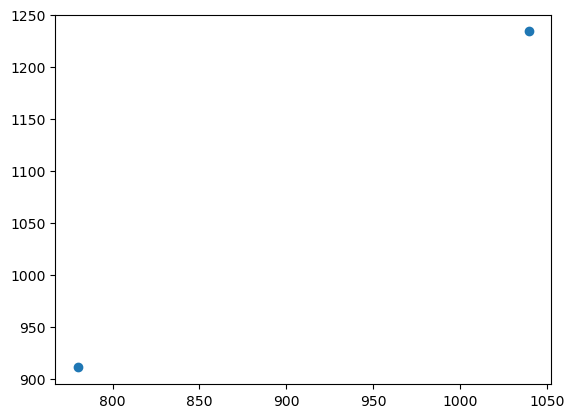

In [76]:
plt.scatter(y_test,predictions)